<a href="https://colab.research.google.com/github/AbuKaisar24/Bengali-News-HeadLine-Categorization-Using-RNN/blob/master/Bengali_News_HeadLine_Categorization_Using_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import pandas as pd

In [0]:
df = pd.read_excel("gdrive/My Drive/Colab Notebooks/headline.xlsx",encoding='utf-8')

In [0]:
df.head()

,NewsType,Headline
0,অর্থনীতি,‘২০ রোজার মধ্যে পাটকল শ্রমিকদের মজুরি দিন’
1,খেলাধুলা,"‘২০০’ ডাকছে, তামিম রাঙাতে পারবেন তো?"
2,মতামত,‘২০টি মডেল ভবন তৈরি করে দেখান’
3,বাংলাদেশ,‘৬ মাসে ২০৮৩ নারী ও শিশু নির্যাতনের শিকার’
4,খেলাধুলা,‘৯০ মাইল বেগে বল করলেই গ্রেট হওয়া যায় না’


In [0]:
for i in range(5):
    print("News:",i+1)
    print("Text:",df.Headline[i])
    print("NewsType:",df.NewsType[i])

News: 1
Text: ‘২০ রোজার মধ্যে পাটকল শ্রমিকদের মজুরি দিন’
NewsType: অর্থনীতি 
News: 2
Text: ‘২০০’ ডাকছে, তামিম রাঙাতে পারবেন তো?
NewsType: খেলাধুলা 
News: 3
Text: ‘২০টি মডেল ভবন তৈরি করে দেখান’
NewsType: মতামত 
News: 4
Text: ‘৬ মাসে ২০৮৩ নারী ও শিশু নির্যাতনের শিকার’
NewsType: বাংলাদেশ 
News: 5
Text: ‘৯০ মাইল বেগে বল করলেই গ্রেট হওয়া যায় না’
NewsType: খেলাধুলা 


In [0]:
contractions = { 
"বি.দ্র ": "বিশেষ দ্রষ্টব্য",
"ড.": "ডক্টর",
"ডা.": "ডাক্তার",
"ইঞ্জি:": "ইঞ্জিনিয়ার",
"রেজি:": "রেজিস্ট্রেশন",
"মি.": "মিস্টার",
"মু.": "মুহাম্মদ",
"মো.": "মোহাম্মদ",
}

In [0]:
import string
import re
def clean_text(text,remove_stopwords = False):
    if True:
        text = text.split()
        new_text = []
        for word in text:
            if word in contractions:
                new_text.append(contractions[word])
            else:
                new_text.append(word)
        text = " ".join(new_text)
    # Format words and remove unwanted characters
    whitespace = re.compile(u"[\s\u0020\u00a0\u1680\u180e\u202f\u205f\u3000\u2000-\u200a]+", re.UNICODE)
    bangla_digits = u"[\u09E6\u09E7\u09E8\u09E9\u09EA\u09EB\u09EC\u09ED\u09EE\u09EF]+"
    english_chars = u"[a-zA-Z0-9]"
    punc = u"[(),$%^&*+={}\[\]:\"|\'\~`<>/,¦!?½£¶¼©⅐⅑⅒⅓⅔⅕⅖⅗⅘⅙⅚⅛⅜⅝⅞⅟↉¤¿º;-]+"
    bangla_fullstop = u"\u0964"     #bangla fullstop(dari)
    
    punctSeq   = u"['\"“”‘’]+|[.?!,…]+|[:;]+"
    
    text = re.sub(bangla_digits, " ", text)
    text = re.sub(punc, " ", text)
    text = re.sub(english_chars, " ", text)
    text = re.sub(bangla_fullstop, " ", text)
    text = re.sub(punctSeq, " ", text)
    text = whitespace.sub(" ", text).strip()
    
    text = re.sub(r'https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)
    text = re.sub(r'\<a href', ' ', text)
    text = re.sub(r'&amp;‘:‘ ’', '', text) 
    text = re.sub(r'[_"\-;%()|+&=*%.,!?:#$@\[\]/]। ,', ' ', text)
    text = re.sub(r'<br />', ' ', text)
    text = re.sub(r'\'', ' ', text)
    text = re.sub(r"[\@$#%~+-\.\'।\"]"," ",text)
    text = re.sub(r"(?m)^\s+", "", text)
    text = re.sub("[()]","",text)
    text = re.sub("[‘’]","",text)
    text = re.sub("[!]","",text)
    text = re.sub("[/]","",text)
    text = re.sub("[:]","",text)
    text= re.sub('\ |\?|\.|\!|\/|\;|\:', ' ',text)
    text= text.strip("/")
    
    if remove_stopwords:
        k = []
        with open('gdrive/My Drive/Colab Notebooks/Banglastopword.txt', 'r',encoding="utf-8") as f:
            for word in f:
                word = word.split()
                k.append(word[0])
            text = [t for t in text if t not in k]
            text = "".join(text)
            
    return text

In [0]:
clean_type = []
for newstype in df.NewsType:
    clean_type.append(clean_text(newstype,remove_stopwords=True))

clean_texts = []
for text in df.Headline:
    clean_texts.append(clean_text(text))

In [0]:
import itertools
import os
import numpy as np # linear algebra
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.preprocessing import LabelBinarizer, LabelEncoder
from sklearn.metrics import confusion_matrix

from tensorflow import keras
import keras.utils as ku
from keras.callbacks import EarlyStopping
from keras.utils.vis_utils import plot_model
from keras.layers import Dropout
from keras import optimizers
from tensorflow import set_random_seed
from numpy.random import seed
set_random_seed(2)
seed(1)

layers = keras.layers
models = keras.models


Using TensorFlow backend.


In [0]:

df['NewsType'].value_counts()

আন্তর্জাতিক            1609
বাংলাদেশ               1003
বিজ্ঞান ও প্রযুক্তি     996
খেলাধুলা                972
বিনোদন                  807
মতামত                   798
শিক্ষা                  794
অর্থনীতি                782
জীবন যাপন               750
চাকুরি                   91
Name: NewsType, dtype: int64

In [0]:
train_size = int(len(df) * .80)
print ("Train size: %d" % train_size)
print ("Test size: %d" % (len(df) - train_size))

Train size: 6881
Test size: 1721


In [0]:
def train_test_split(df, train_size):
    train = df[:train_size]
    test = df[train_size:]
    return train, test

In [0]:
train_cat, test_cat = train_test_split(df['NewsType'], train_size,)
train_text, test_text = train_test_split(df['Headline'], train_size,)

In [0]:
max_words = 5000
tokenize = keras.preprocessing.text.Tokenizer(num_words=max_words, 
                                              char_level=False)

In [0]:
tokenize.fit_on_texts(train_text)
x_train = tokenize.texts_to_matrix(train_text)
x_test = tokenize.texts_to_matrix(test_text)

In [0]:
encoder = LabelEncoder()
encoder.fit(train_cat)
y_train = encoder.transform(train_cat)
y_test = encoder.transform(test_cat)

In [0]:
num_classes = np.max(y_train) + 1
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [0]:
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

x_train shape: (6881, 5000)
x_test shape: (1721, 5000)
y_train shape: (6881, 10)
y_test shape: (1721, 10)


In [0]:
batch_size = 16
epochs = 80
adam=keras.optimizers.Adam(learning_rate=0.0005, beta_1=0.9, beta_2=0.999, amsgrad=False)

In [0]:
model = models.Sequential()
model.add(layers.Dense(16,kernel_initializer='uniform',input_shape=(max_words,)))
model.add(layers.Dropout(0.2))
model.add(layers.Activation('relu'))
model.add(layers.Dense(num_classes))
model.add(layers.Dropout(0.2))
model.add(layers.Activation('softmax'))
model.compile(loss='categorical_crossentropy',optimizer=adam,metrics=['accuracy'])
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 16)                80016     
_________________________________________________________________
dropout_14 (Dropout)         (None, 16)                0         
_________________________________________________________________
activation_14 (Activation)   (None, 16)                0         
_________________________________________________________________
dense_15 (Dense)             (None, 10)                170       
_________________________________________________________________
dropout_15 (Dropout)         (None, 10)                0         
_________________________________________________________________
activation_15 (Activation)   (None, 10)                0         
Total params: 80,186
Trainable params: 80,186
Non-trainable params: 0
__________________________________________________

In [0]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=2,
                    validation_split=0.2)

Train on 5504 samples, validate on 1377 samples
Epoch 1/80
5504/5504 - 1s - loss: 2.2699 - acc: 0.1541 - val_loss: 2.1977 - val_acc: 0.2941
Epoch 2/80
5504/5504 - 1s - loss: 2.1526 - acc: 0.2100 - val_loss: 2.0599 - val_acc: 0.3457
Epoch 3/80
5504/5504 - 1s - loss: 1.9940 - acc: 0.3272 - val_loss: 1.9271 - val_acc: 0.4430
Epoch 4/80
5504/5504 - 1s - loss: 1.8173 - acc: 0.4431 - val_loss: 1.7982 - val_acc: 0.5105
Epoch 5/80
5504/5504 - 1s - loss: 1.6440 - acc: 0.5223 - val_loss: 1.6814 - val_acc: 0.5461
Epoch 6/80
5504/5504 - 1s - loss: 1.4970 - acc: 0.5625 - val_loss: 1.5902 - val_acc: 0.5599
Epoch 7/80
5504/5504 - 1s - loss: 1.3782 - acc: 0.5908 - val_loss: 1.5125 - val_acc: 0.5759
Epoch 8/80
5504/5504 - 1s - loss: 1.2739 - acc: 0.6297 - val_loss: 1.4602 - val_acc: 0.5766
Epoch 9/80
5504/5504 - 1s - loss: 1.1810 - acc: 0.6504 - val_loss: 1.4098 - val_acc: 0.5824
Epoch 10/80
5504/5504 - 1s - loss: 1.1049 - acc: 0.6650 - val_loss: 1.3783 - val_acc: 0.5839
Epoch 11/80
5504/5504 - 1s - lo

In [0]:
score = model.evaluate(x_train, y_train,
                       batch_size=batch_size, verbose=2)
print('Train loss:', score[0])
print('Train accuracy:', score[1])

6881/6881 - 0s - loss: 0.5132 - acc: 0.9013
Train loss: 0.5132059963872972
Train accuracy: 0.9013225


In [0]:
score = model.evaluate(x_test, y_test,
                       batch_size=batch_size, verbose=2)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

1721/1721 - 0s - loss: 2.5024 - acc: 0.4951
Test loss: 2.502389245501512
Test accuracy: 0.495061


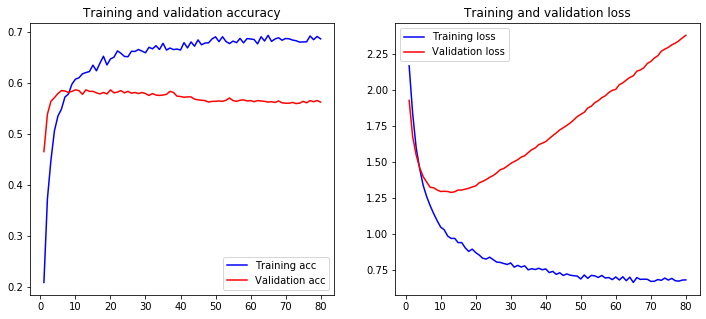

In [0]:
def plot_history(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)
    
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
plot_history(history)

In [0]:
text_labels = encoder.classes_ 
for i in range(20):
    prediction = model.predict(np.array([x_test[i]]))
    predicted_label = text_labels[np.argmax(prediction)]
    print(test_text.iloc[i][:50], "...")
    print('Actual NewsType:' + test_cat.iloc[i])
    print("Predicted NewsType: " + predicted_label + "\n")  

যুদ্ধ ব্যবসায়ী এরিক প্রিন্স কেন মিয়ানমারে ...
Actual NewsType:মতামত 
Predicted NewsType: আন্তর্জাতিক 

যুদ্ধ যুদ্ধ খেলায় ‘হিরো’ ইমরান! ...
Actual NewsType:আন্তর্জাতিক 
Predicted NewsType: আন্তর্জাতিক 

যুদ্ধবাজদের এখন পোয়াবারো ...
Actual NewsType:আন্তর্জাতিক 
Predicted NewsType: বিনোদন 

যুদ্ধবিমান ভূপাতিতের দাবি ভারতের ‘যুদ্ধ উন্মাদনা’: ...
Actual NewsType:আন্তর্জাতিক 
Predicted NewsType: আন্তর্জাতিক 

যুদ্ধবিমানের অপব্যবহার, পাকিস্তানের কাছে জবাব চায়  ...
Actual NewsType:আন্তর্জাতিক 
Predicted NewsType: আন্তর্জাতিক 

যুদ্ধাপরাধীদের বিচার থমকে যাবে না: মোজাম্মেল হক ...
Actual NewsType:বাংলাদেশ 
Predicted NewsType: বাংলাদেশ 

যুদ্ধাবস্থার জন্য যুক্তরাষ্ট্রকেই দায়ী করছে ইউরোপ ...
Actual NewsType:আন্তর্জাতিক 
Predicted NewsType: বিনোদন 

যুদ্ধে জড়াবে যুক্তরাষ্ট্র-চীন? ...
Actual NewsType:আন্তর্জাতিক 
Predicted NewsType: আন্তর্জাতিক 

যুদ্ধের দারুণ এক খেলা ...
Actual NewsType:বিজ্ঞান ও প্রযুক্তি
Predicted NewsType: মতামত 

যুব বাজেট: যুবদের উন্নয়ন, প্রত্যাশা ও করণীয় ...
Actual NewsType:মত

In [0]:
y_softmax = model.predict(x_test)

y_test_1d = []
y_pred_1d = []

for i in range(len(y_test)):
    probs = y_test[i]
    index_arr = np.nonzero(probs)
    one_hot_index = index_arr[0].item(0)
    y_test_1d.append(one_hot_index)

for i in range(0, len(y_softmax)):
    probs = y_softmax[i]
    predicted_index = np.argmax(probs)
    y_pred_1d.append(predicted_index)

In [0]:
import matplotlib.font_manager as fm
prop = fm.FontProperties(fname='gdrive/My Drive/Colab Notebooks/kalpurush.ttf')
fontproperties=prop
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=20)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90, fontsize=25, fontproperties=prop)
    plt.yticks(tick_marks, classes, fontsize=25, fontproperties=prop)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[0])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    
    plt.ylabel('True label', fontsize=20)
    plt.xlabel('Predicted label', fontsize=20)

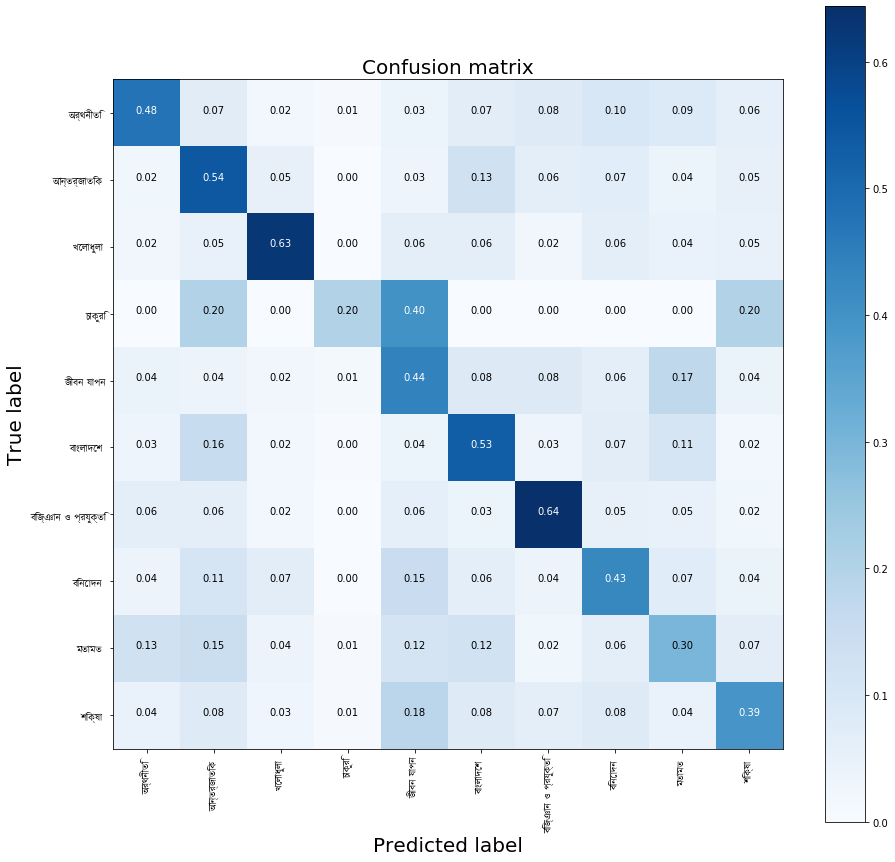

In [0]:
cnf_matrix = confusion_matrix(y_test_1d, y_pred_1d)
plt.figure(figsize=(15,15))
plot_confusion_matrix(cnf_matrix, classes=text_labels, title="Confusion matrix")
plt.show()